### Testing Evo

#### Imports

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import math
import torch_geometric
from torch_geometric.nn import GCNConv
import IPython
from IPython.display import display, HTML, Image

from graphUtils import add_edges
from generator import generate_organism
from cell import Cell
from organism import Organism
from GNCAmodel import GNCA
from visualizer import Visualizer
from evo_trainer import Evo_Trainer

#%run Visualizer.py # --allows for reloading the particular code

#### Train the network

In [2]:
n = 10
popsize = 10
generations = 300
wrap_around = True
name = 'centered8'
#device = torch.device('mps:0')
device = torch.device('cpu')
#trainer = Evo_Trainer(n, device)
trainer = Evo_Trainer(n, device, popsize)

2023-02-20 15:50:00,769	INFO worker.py:1528 -- Started a local Ray instance.


[2023-02-20 15:50:03] INFO     <21784> evotorch.core: Instance of `Custom_NEProblem` (id:11351706544) -- The `dtype` for the problem's decision variables is set as torch.float32
[2023-02-20 15:50:03] INFO     <21784> evotorch.core: Instance of `Custom_NEProblem` (id:11351706544) -- `eval_dtype` (the dtype of the fitnesses and evaluation data) is set as torch.float32
[2023-02-20 15:50:03] INFO     <21784> evotorch.core: Instance of `Custom_NEProblem` (id:11351706544) -- The `device` of the problem is set as cpu
[2023-02-20 15:50:03] INFO     <21784> evotorch.core: Instance of `Custom_NEProblem` (id:11351706544) -- The number of actors that will be allocated for parallelized evaluation is 10
[2023-02-20 15:50:03] INFO     <21784> evotorch.core: Instance of `Custom_NEProblem` (id:11351706544) -- Number of GPUs that will be allocated per actor is None


/Users/martinholst/miniconda3/envs/AML/lib/python3.10/site-packages/evotorch/tools/misc.py:1107: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  result = torch.tensor(data, **kwargs)


In [3]:
trainer.train(generations, name)

         iter : 1
     stepsize : ReadOnlyTensor(0.9934)
  median_eval : -161.1393280029297
    mean_eval : -177.41773986816406
pop_best_eval : 71.25452423095703

         iter : 2
     stepsize : ReadOnlyTensor(0.9871)
  median_eval : -147.08840942382812
    mean_eval : -169.0550537109375
pop_best_eval : -65.09843444824219

         iter : 3
     stepsize : ReadOnlyTensor(0.9813)
  median_eval : -172.27650451660156
    mean_eval : -168.07679748535156
pop_best_eval : -121.49764251708984

         iter : 4
     stepsize : ReadOnlyTensor(0.9757)
  median_eval : -173.05184936523438
    mean_eval : -225.65464782714844
pop_best_eval : -98.59286499023438

         iter : 5
     stepsize : ReadOnlyTensor(0.9704)
  median_eval : -152.6630859375
    mean_eval : -306.0093688964844
pop_best_eval : -25.12076759338379

         iter : 6
     stepsize : ReadOnlyTensor(0.9652)
  median_eval : -171.8585205078125
    mean_eval : -227.67689514160156
pop_best_eval : -99.79994201660156

         iter : 7


In [4]:
network = trainer.get_trained_network()

In [5]:
network = trainer.problem.parameterize_net(trainer.searcher.status['best'][0])
#network = trainer.problem.parameterize_net(trainer.searcher.status['center'][0])

#### Visualize trained network

In [6]:
organism = generate_organism(n, device)
graph = organism.toGraph()
visualizer = Visualizer(wrap_around)
network(graph, 0)

(Data(x=[30, 10], edge_index=[1, 0], device=cpu, attr=[1]),
 tensor([0., 0.]),
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0)

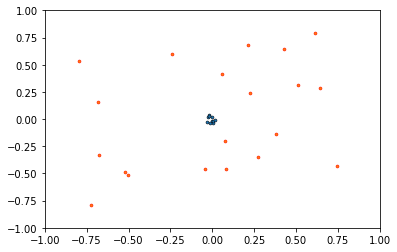

In [7]:
anim = visualizer.animate_organism(graph, network, food=30, frames=100)
visualizer.save_animation_to_gif(anim, name, 10)

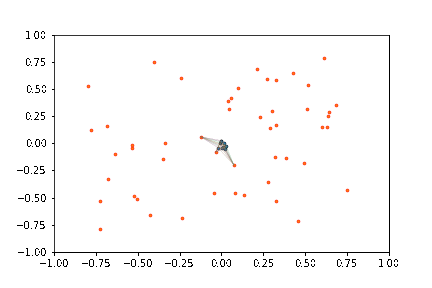

In [8]:
Image('../animation/' + name + '.gif')

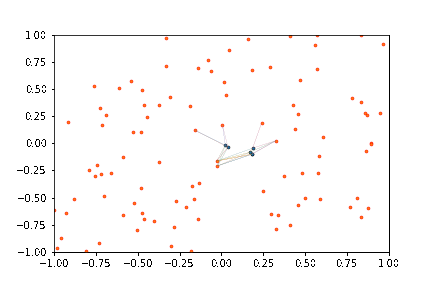

In [9]:
Image('../animation/GATConv1.gif')

In [10]:
anim.frame_seq = anim.new_saved_frame_seq() 
IPython.display.HTML(anim.to_jshtml())

In [11]:
print(network)

CGConv1(
  (conv_layer_cells): CGConv(8, dim=4)
  (conv_layer_food): CGConv(8, dim=4)
  (mlp): Sequential(
    (0): ReLU()
    (1): Linear(in_features=16, out_features=16, bias=True)
    (2): ReLU()
    (3): Linear(in_features=16, out_features=7, bias=True)
    (4): Tanh()
  )
  (mlp_before): Sequential(
    (0): Linear(in_features=8, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
  )
)


In [12]:
print('conv_layers1: ', network.conv_layer_cells)
for param in network.conv_layer_cells.parameters():
  print(param.data)

print('conv_layers2: ', network.conv_layer_food)
for param in network.conv_layer_food.parameters():
  print(param.data)

conv_layers1:  CGConv(8, dim=4)
tensor([[ -3.6505,  -2.1424, -12.9970,  -2.6160,   4.2347,  -3.1665,   1.8230,
           2.1542,  -5.3949,  -2.7138,   8.1577,  -1.7242,  -3.4682,  -1.2532,
           3.9885,   3.0873,  -4.7614,   1.0876,  -4.8884,   3.3611],
        [  0.7553,  -2.1499,   1.1480,   2.3779,   1.9961,  -5.8370,   9.3376,
          -3.3853,   1.5408,  -6.9193,   3.9484,  -0.9608,  -0.7092,   0.2437,
          -2.4104,   9.5877,   0.3443,  -1.6813,   2.0031,   2.8338],
        [ -3.3747,   6.6360,  -0.1252,  -1.3386,   2.0623,   0.8472,   7.9409,
           4.0481,  -6.0111,  -0.4755,  -0.6424,  -0.2056,   1.9268,   1.9647,
           2.7351,   0.9932,   1.8936,  -1.4706,  -5.5890,  -3.0722],
        [  3.8571,   4.6580,   5.0586,   0.3815,  -4.6491,   0.8093,  -7.3896,
          -0.6397,  -3.9090,  -3.8184,  -5.6740,  -2.0319,  -0.0170,   1.8399,
           1.6198,  -2.1595,   1.3122,   4.9466,  -3.8876,  -6.4111],
        [ -1.9248,   5.5737,   2.9994,  -0.9367,   1.197

In [13]:
%%javascript
IPython.notebook.save_notebook()

<IPython.core.display.Javascript object>

#### Visualization of loss:

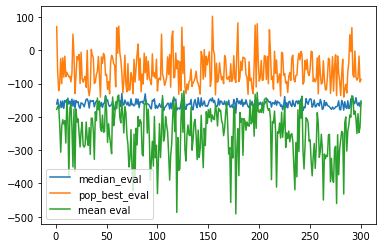

In [14]:
import matplotlib.pyplot as plt
losses = trainer.logger_df
#plt.plot(losses.stepsize)
plt.plot(losses.median_eval)
plt.plot(losses.pop_best_eval)
plt.plot(losses.mean_eval)
plt.legend(('median_eval', 'pop_best_eval', 'mean eval'))
plt.show()